In [1]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

C:\Users\rodelga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_root_dir = r'D:\CIC\Train and Test\Filter 40 - DT'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

rf_classifier = RandomForestClassifier(n_estimators = 10, random_state = 10, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_classifier.predict(X_test)

rf_results = confusion_matrix(y_test, y_pred_rf)
rf_error = zero_one_loss(y_test, y_pred_rf)
rf_score = accuracy_score(y_test, y_pred_rf) * 100
rf_report = classification_report(y_test, y_pred_rf)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [4]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Decision Tree Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{rf_results[0]}")
print(f"{rf_results[1]} \n")

print("Report :")
print(rf_report) 

print(f"True Postive   : {rf_results[0][0]}")
print(f"False Positive : {rf_results[0][1]}")
print(f"False Negative : {rf_results[1][0]}")
print(f"True Negative  : {rf_results[1][1]}")
print(f"Error Value    : {rf_error}")
print(f"Accuracy_Score : {rf_score}")
print("=================================================")

Total time: 229.0770 seconds 

Decision Tree Classifier Results
Confusion Matrix:
[3982753   33917]
[392304 432199] 

Report :
              precision    recall  f1-score   support

           0       0.91      0.99      0.95   4016670
           1       0.93      0.52      0.67    824503

    accuracy                           0.91   4841173
   macro avg       0.92      0.76      0.81   4841173
weighted avg       0.91      0.91      0.90   4841173

True Postive   : 3982753
False Positive : 33917
False Negative : 392304
True Negative  : 432199
Error Value    : 0.08804085290899544
Accuracy_Score : 91.19591470910045


In [11]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Tot Fwd Pkts         0.101779
Bwd Pkt Len Max      0.099448
Subflow Bwd Pkts     0.070464
Pkt Len Mean         0.066091
TotLen Bwd Pkts      0.063146
Bwd Seg Size Avg     0.053907
Fwd Pkt Len Std      0.052963
Bwd Pkt Len Mean     0.052739
Idle Mean            0.052039
Fwd Act Data Pkts    0.047629
Idle Max             0.045816
Bwd Pkt Len Std      0.043376
URG Flag Cnt         0.043287
Bwd IAT Max          0.034815
Bwd IAT Min          0.033542
Fwd Pkt Len Min      0.028575
Protocol             0.020209
Pkt Len Min          0.020115
ECE Flag Cnt         0.018333
SYN Flag Cnt         0.010021
FIN Flag Cnt         0.009952
Active Mean          0.008188
Active Min           0.007835
Active Max           0.004902
Fwd PSH Flags        0.004571
Idle Std             0.003210
Active Std           0.002606
Bwd Pkt Len Min      0.000356
Fwd URG Flags        0.000047
CWE Flag Count       0.000039
Bwd URG Flags        0.000000
Bwd Blk Rate Avg     0.000000
Bwd PSH Flags        0.000000
Bwd Byts/b

Top 20 features:
---------------------------------
Tot Fwd Pkts         0.101779
Bwd Pkt Len Max      0.099448
Subflow Bwd Pkts     0.070464
Pkt Len Mean         0.066091
TotLen Bwd Pkts      0.063146
Bwd Seg Size Avg     0.053907
Fwd Pkt Len Std      0.052963
Bwd Pkt Len Mean     0.052739
Idle Mean            0.052039
Fwd Act Data Pkts    0.047629
Idle Max             0.045816
Bwd Pkt Len Std      0.043376
URG Flag Cnt         0.043287
Bwd IAT Max          0.034815
Bwd IAT Min          0.033542
Fwd Pkt Len Min      0.028575
Protocol             0.020209
Pkt Len Min          0.020115
ECE Flag Cnt         0.018333
SYN Flag Cnt         0.010021
dtype: float64


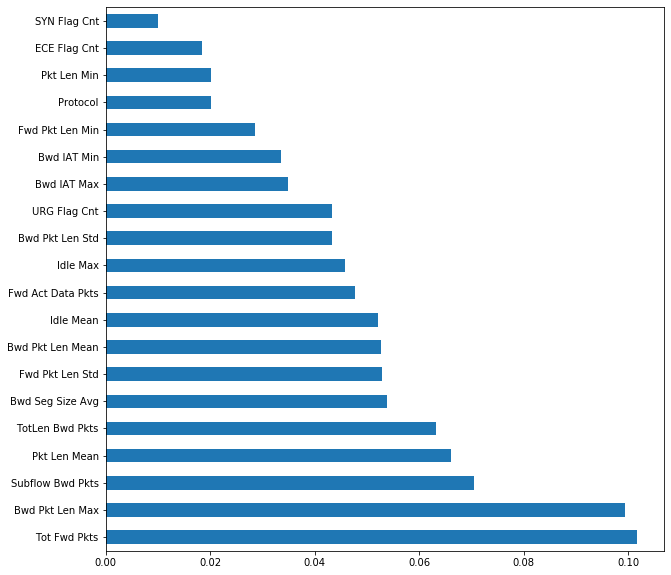

In [12]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Timestamp           0.000000
Bwd PSH Flags       0.000000
Bwd URG Flags       0.000000
Fwd Byts/b Avg      0.000000
Fwd Pkts/b Avg      0.000000
Fwd Blk Rate Avg    0.000000
Bwd Byts/b Avg      0.000000
Bwd Pkts/b Avg      0.000000
Bwd Blk Rate Avg    0.000000
CWE Flag Count      0.000039
Fwd URG Flags       0.000047
Bwd Pkt Len Min     0.000356
Active Std          0.002606
Idle Std            0.003210
Fwd PSH Flags       0.004571
Active Max          0.004902
Active Min          0.007835
Active Mean         0.008188
FIN Flag Cnt        0.009952
SYN Flag Cnt        0.010021
dtype: float64


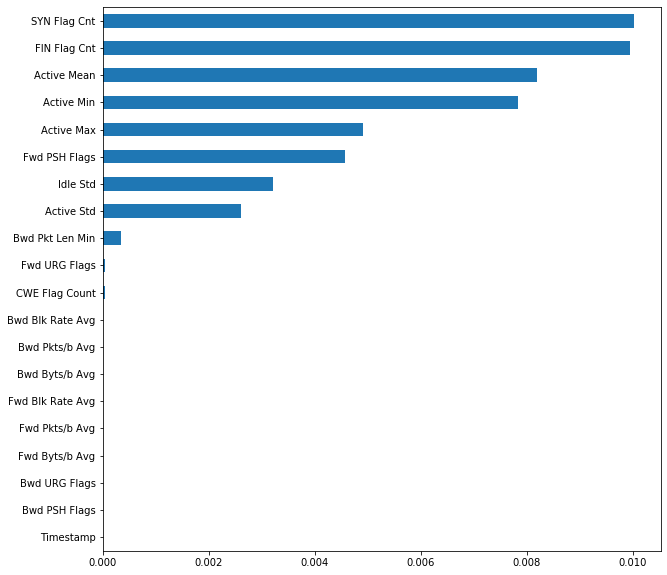

In [13]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))